### Table of contents:

* [1. Preprocessing](#chapter1)
    * [1.1 Requirements](#section_1_1)
    * [1.2 Imports](#section_1_2)
    * [1.3 Get data](#section_1_3)
    * [1.4 Process data](#section_1_4)

# 1. Preprocessing <a class="anchor" id="chapter1"></a>

## 1.1 Requirements <a class="anchor" id="section_1_1"></a>

In [4]:
pip install pandas

     |████████████████████████████████| 11.7 MB 355 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade nltk

     |████████████████████████████████| 1.5 MB 3.0 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install matplotlib

     |████████████████████████████████| 11.2 MB 3.3 MB/s 
     |████████████████████████████████| 898 kB 27.8 MB/s 
     |████████████████████████████████| 1.6 MB 15.4 MB/s 
Note: you may need to restart the kernel to use updated packages.


## 1.2 Imports <a class="anchor" id="section_1_2"></a>

In [1]:
import pandas as pd

import re
import string

import nltk
nltk.download('stopwords')

import matplotlib.pyplot as plt

import os

[nltk_data] Downloading package stopwords to /home/alina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1.3 Get data <a class="anchor" id="section_1_3"></a>

In [2]:
# Table only with news 'headline' and 'content'

pd.set_option('max_colwidth',150)
data = pd.read_csv ('data_labeled.csv')
data_text = data.loc[:, ['label', 'headline', 'content']]

In [3]:
# Search for null values

for col in data_text.columns:
    print(col, data_text[col].isnull().sum())

label 13
headline 20
content 13


In [4]:
# Remove rows with null content

data_text = data_text[data_text['content'].notna()]
print("Total number of news: " + str(len(data_text)))

Total number of news: 645


In [5]:
# Join 'headline' and 'content'

for index, row in data_text.iterrows():
    if isinstance(row['headline'], float): pass
    else: 
        if row['headline'] not in row['content']: row['content'] = row['headline'] + ' ' + row['content']
data_text.drop('headline', axis = 1, inplace = True)
data_text.head()

,label,content
0,literal,"Prisão perpétua para homem que tentou assassinar senadora No dia 8 de Janeiro de 2011 Jared Loughner tentou matar, sem sucesso, a então senadora G..."
1,literal,"John Nash, matemático de Uma Mente Brilhante, morre em acidente John Nash, o matemático e Nobel da Economia que foi retratado por Russell Crowe no..."
2,estigma,O mito da reeleição mínima garantida Cavaco sairá desta campanha pior do que entrou. Os casos das acções na SLN ou da casa de férias no Algarve nã...
3,literal,"Morreu Rita Levi-Montalcini, a grande dama da ciência italiana A cientista e senadora italiana Rita Levi-Montalcini, Prémio Nobel da Medicina de 1..."
4,literal,"Por trás da porta amarela, há um homem com problemas psicológicos Pub Ninguém sabe o que ele está a fazer. Ninguém sabe em que é que pensa, o que..."


## 1.4 Process data <a class="anchor" id="section_1_4"></a>

In [6]:
# Cleaning

irrelevant = ["pub", "pág", "reportagem", "clique", "subscrever", "partilhar", "dn", "publico.pt", "rtp", "cartaz", "tv", "hoje", "amanhã", "ontem", "segundafeira", "terçafeira", "quartafeira", "quintafeira", "sextafeira", "sábado", "domingo", "janeiro", "fevereiro", "março", "abril", "maio", "junho", "julho", "agosto", "outubro", "novembro", "dezembro"] # list with irrelevant words/expressions do the news content

stopwords = nltk.corpus.stopwords.words('portuguese') # pt stopwords

sent_tokenizer = nltk.data.load('tokenizers/punkt/portuguese.pickle') # pt sentence tokenizer

#nlp = stanza.Pipeline('pt') # pt stanza

def clean_text(text):

    text = text.lower() # lowercase
    text = re.sub(r'http\S+', '', text) # URLs removal
    text = re.sub('\[.*?\]', '', text) # remove text in square brackets
    text = re.sub(r"\([^()]*\)", '', text) # remove text within parentheses
    text = re.sub(r'-(me|te|se|nos|vos|o|os|a|as|lo|los|la|las|lhe|lhes|lha|lhas|lho|lhos|no|na|nas|mo|ma|mos|mas|to|ta|tos|tas)', '', text) # remove pronouns at the end of the words
    sentences = sent_tokenizer.tokenize(text)
    text = ' '.join([sentence for sentence in sent_tokenizer.tokenize(text) if len(sentence) > 15]) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('[‘’“”«|»…]', '', text)
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = ' '.join([word for word in text.split() if word not in stopwords]) # remove stopwords
    text = ' '.join([word for word in text.split() if len(word) > 2]) # remove words with length <= 2
    text = re.sub(r'Pág.*por pág$', '', text) # remove irrelevant text
    text = ' '.join([word for word in text.split() if word not in irrelevant]) 
    #text = nlp(text)
    #text = ' '.join([word.lemma for sent in text.sentences for word in sent.words]) 

    return text

data_text["content"] = data_text.content.apply(lambda x: clean_text(x))
data_clean = data_text
data_clean.head()

,label,content
0,literal,prisão perpétua homem tentou assassinar senadora dia jared loughner tentou matar sucesso então senadora gabrielle giffords eleita partido democrat...
1,literal,john nash matemático mente brilhante morre acidente john nash matemático nobel economia retratado russell crowe filme mente brilhante morreu acide...
2,estigma,mito reeleição mínima garantida cavaco sairá desta campanha pior entrou casos acções sln casa férias algarve revelaram qualquer ilegalidade pudess...
3,literal,morreu rita levintalcini grande dama ciência italiana cientista senadora italiana rita levintalcini prémio nobel medicina morreu neste anos casa r...
4,literal,trás porta amarela homem problemas psicológicos ninguém sabe fazer ninguém sabe pensa come sobrevive dois anos desde mulher pânico levou dois filh...


In [7]:
# Count the number of vales in each of the two labels/categories ['estigma', 'label']

data_clean['label'].value_counts()

estigma    372
literal    273
Name: label, dtype: int64

<AxesSubplot:xlabel='label'>

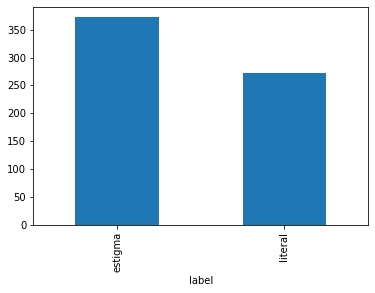

In [8]:
# Plot the distribution of the two labels

data_clean.groupby('label').label.count().plot.bar(ylim=0)

In [9]:
# Associate label names with binary numerical values

data_clean['label'] = data_clean['label'].factorize()[0]
data_clean.head()

,label,content
0,0,prisão perpétua homem tentou assassinar senadora dia jared loughner tentou matar sucesso então senadora gabrielle giffords eleita partido democrat...
1,0,john nash matemático mente brilhante morre acidente john nash matemático nobel economia retratado russell crowe filme mente brilhante morreu acide...
2,1,mito reeleição mínima garantida cavaco sairá desta campanha pior entrou casos acções sln casa férias algarve revelaram qualquer ilegalidade pudess...
3,0,morreu rita levintalcini grande dama ciência italiana cientista senadora italiana rita levintalcini prémio nobel medicina morreu neste anos casa r...
4,0,trás porta amarela homem problemas psicológicos ninguém sabe fazer ninguém sabe pensa come sobrevive dois anos desde mulher pânico levou dois filh...


In [10]:
# Dictionary that stores label/index and index/label conversion

index_to_label = {0: 'literal', 1: 'stigma'}
label_to_index = {'literal': 0, 'stigma': 1}
label_to_index

{'literal': 0, 'stigma': 1}

In [13]:
parent = os.path.dirname(os.getcwd())

data_clean.to_pickle(parent+"/classification/data_preprocessed.pkl")